# Advanced Data Visualization in Python

Welcome to this comprehensive guide on advanced data visualization techniques! This notebook will take you beyond basic charts and show you how to create sophisticated, publication-ready visualizations using matplotlib and seaborn.

## What You'll Learn:
1. **Advanced Plotting Libraries** - Matplotlib, Seaborn, and statistical plotting techniques
2. **Statistical Visualizations** - Distribution plots, regression plots, and statistical summaries
3. **Multi-dimensional Visualizations** - Creating complex charts with multiple data dimensions
4. **Custom Styling** - Making your plots publication-ready with professional formatting
5. **Complex Multi-panel Figures** - Combining multiple visualizations effectively
6. **Dashboard-Style Analysis** - Creating comprehensive analytical dashboards

## Dataset: Ames Housing Data
We'll continue working with the Ames Housing dataset to demonstrate advanced visualization techniques.

## Key Features:
- **Reliable & Consistent** - Uses matplotlib and seaborn for guaranteed compatibility
- **Publication-Ready** - Professional styling and formatting throughout
- **Statistical Integration** - Built-in statistical analysis and annotations
- **Multi-dimensional** - Complex visualizations showing multiple data aspects


## Step 1: Setup and Data Preparation

Let's start by importing all the necessary libraries and preparing our data for advanced visualizations.


In [7]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set up plotting parameters for publication-quality figures
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 16

# Set style
sns.set_style("whitegrid")
sns.set_palette("husl")

# Load and prepare data
df = pd.read_csv('AmesHousing.csv')

# Clean the data (basic cleaning)
df_clean = df.copy()
categorical_columns = df_clean.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col] = df_clean[col].fillna('Unknown')

numerical_columns = df_clean.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Create some derived features
df_clean['Total_SF'] = df_clean['1st Flr SF'] + df_clean['2nd Flr SF'] + df_clean['Total Bsmt SF']
df_clean['House_Age'] = df_clean['Yr Sold'] - df_clean['Year Built']
df_clean['Price_Per_SF'] = df_clean['SalePrice'] / df_clean['Gr Liv Area']

print("Data loaded and prepared successfully!")
print(f"Dataset shape: {df_clean.shape}")
print(f"Features: {df_clean.shape[1]}")
print(f"Missing values: {df_clean.isnull().sum().sum()}")


Data loaded and prepared successfully!
Dataset shape: (2930, 85)
Features: 85
Missing values: 0


## Step 2: Advanced Statistical Visualizations

Let's create sophisticated statistical plots that reveal deeper insights about our data.


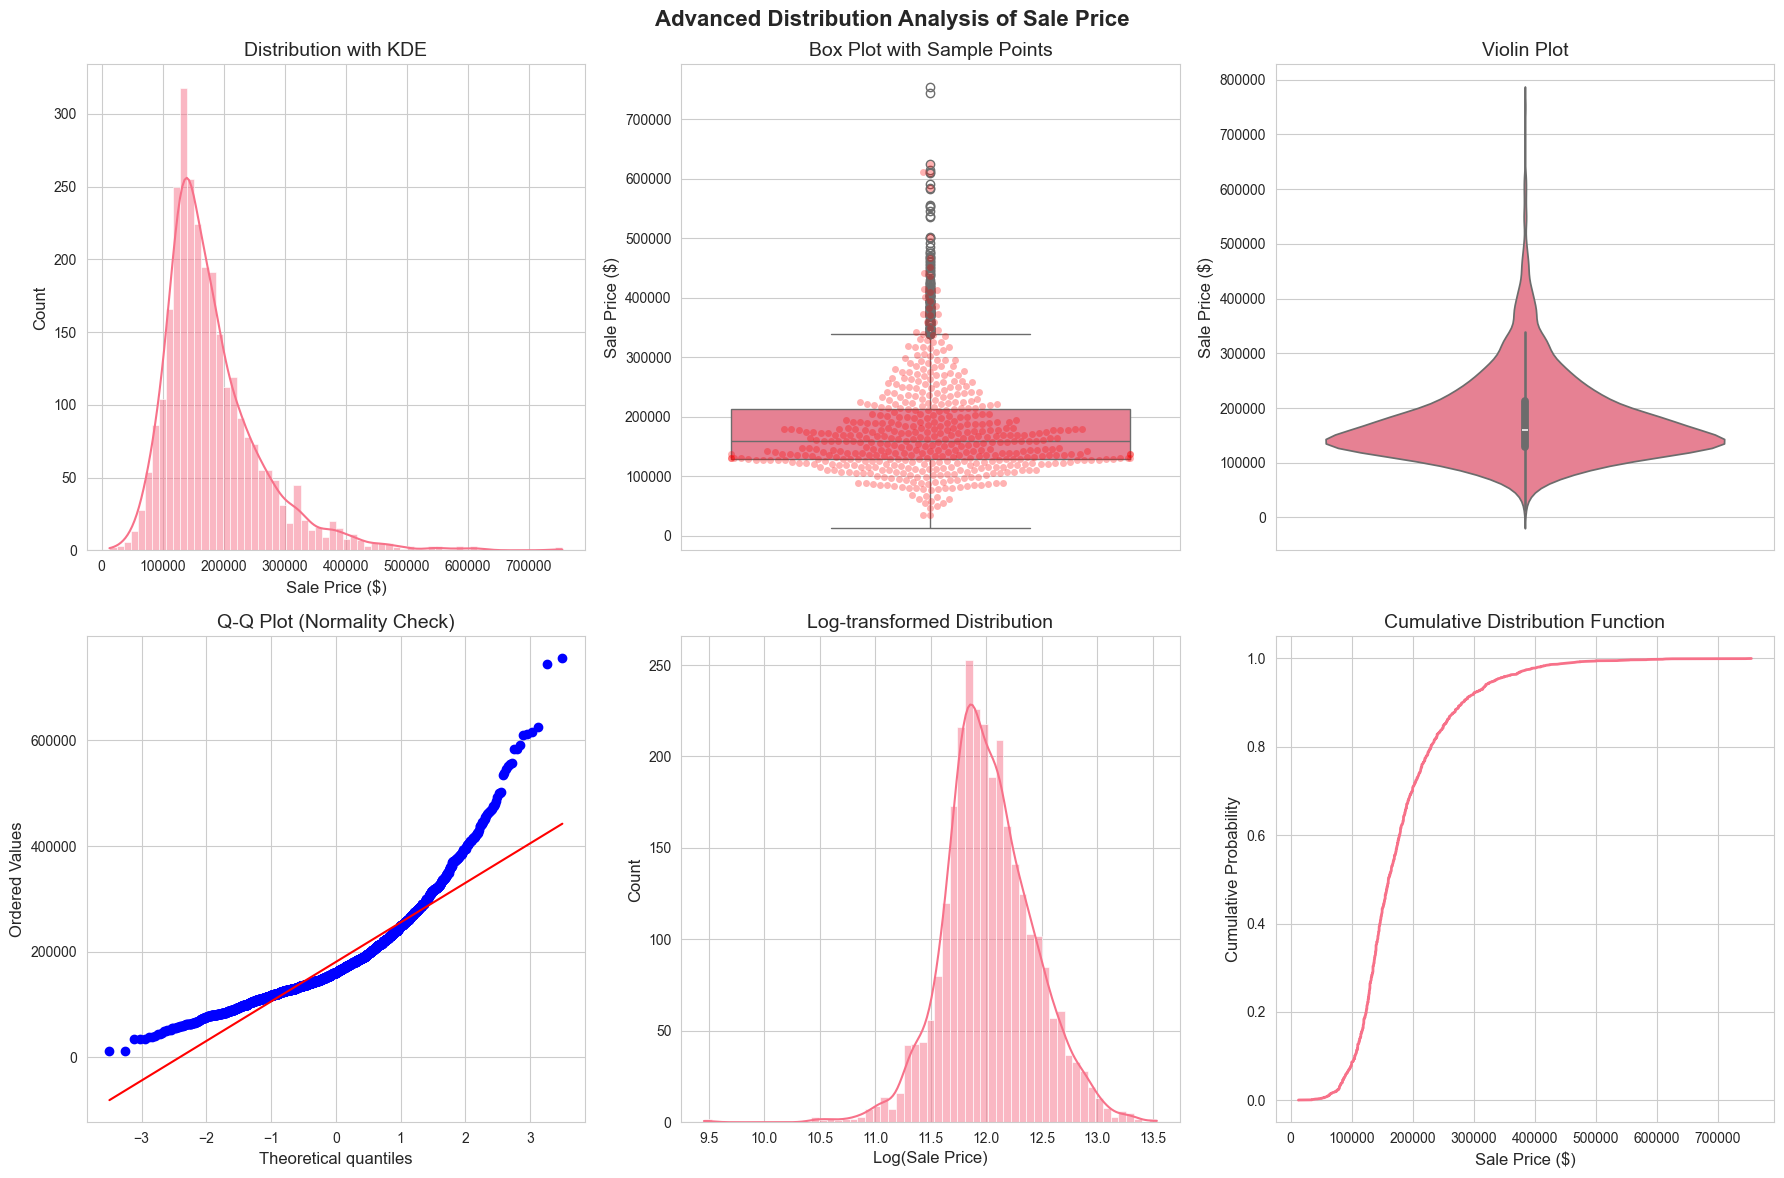

In [8]:
# 1. Advanced Distribution Analysis with Multiple Plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Advanced Distribution Analysis of Sale Price', fontsize=16, fontweight='bold')

# Histogram with KDE
sns.histplot(data=df_clean, x='SalePrice', kde=True, ax=axes[0,0])
axes[0,0].set_title('Distribution with KDE')
axes[0,0].set_xlabel('Sale Price ($)')

# Box plot with swarm plot overlay
sns.boxplot(data=df_clean, y='SalePrice', ax=axes[0,1])
sns.swarmplot(data=df_clean.sample(500), y='SalePrice', color='red', alpha=0.3, ax=axes[0,1])
axes[0,1].set_title('Box Plot with Sample Points')
axes[0,1].set_ylabel('Sale Price ($)')

# Violin plot
sns.violinplot(data=df_clean, y='SalePrice', ax=axes[0,2])
axes[0,2].set_title('Violin Plot')
axes[0,2].set_ylabel('Sale Price ($)')

# Q-Q plot for normality check
from scipy import stats
stats.probplot(df_clean['SalePrice'], dist="norm", plot=axes[1,0])
axes[1,0].set_title('Q-Q Plot (Normality Check)')
axes[1,0].grid(True)

# Log-transformed distribution
sns.histplot(data=df_clean, x=np.log(df_clean['SalePrice']), kde=True, ax=axes[1,1])
axes[1,1].set_title('Log-transformed Distribution')
axes[1,1].set_xlabel('Log(Sale Price)')

# Cumulative distribution
sorted_prices = np.sort(df_clean['SalePrice'])
cumulative = np.arange(1, len(sorted_prices) + 1) / len(sorted_prices)
axes[1,2].plot(sorted_prices, cumulative, linewidth=2)
axes[1,2].set_title('Cumulative Distribution Function')
axes[1,2].set_xlabel('Sale Price ($)')
axes[1,2].set_ylabel('Cumulative Probability')
axes[1,2].grid(True)

plt.tight_layout()
plt.show()


### **Chart 1: Advanced Distribution Analysis (6-Panel Analysis)**

**What We See:**
- **Histogram with KDE**: Shows house prices are right-skewed (more expensive houses are less common)
- **Box Plot with Points**: Reveals many outliers, especially very expensive houses
- **Violin Plot**: Shows the "shape" of price distribution - most houses cluster in lower price ranges
- **Q-Q Plot**: Confirms prices are NOT normally distributed (points don't follow the diagonal line)
- **Log-transformed**: Shows that taking the log of prices makes the distribution more normal
- **Cumulative Distribution**: Shows what percentage of houses fall below any given price

**Key Insights:**
- **Most houses are affordable** - the majority fall below $200,000
- **Price distribution is skewed** - a few very expensive houses pull the average up
- **Log transformation helps** - makes the data more suitable for statistical analysis
- **Outliers exist** - some houses are significantly more expensive than typical

**Business Impact**: Understanding price distribution helps set realistic expectations and identify market segments.

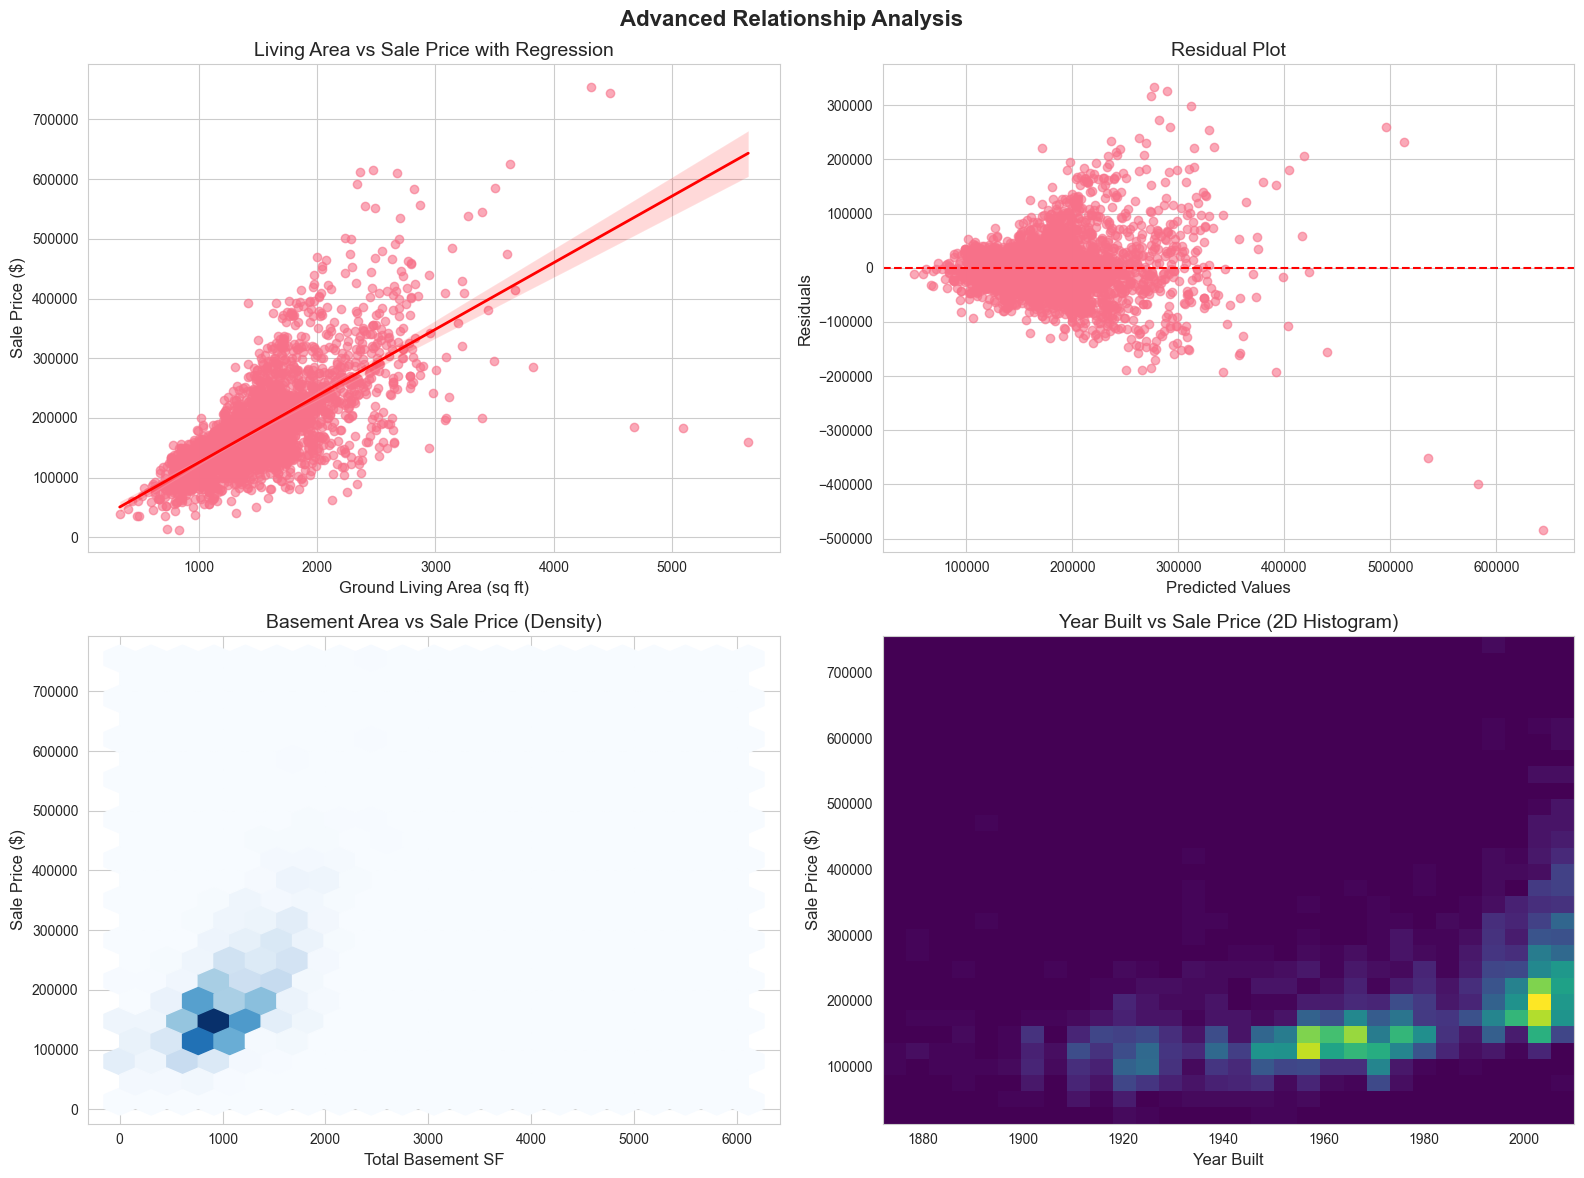

In [ ]:
# 2. Advanced Regression and Relationship Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Advanced Relationship Analysis', fontsize=16, fontweight='bold')

# Joint plot with regression line
sns.regplot(data=df_clean, x='Gr Liv Area', y='SalePrice', ax=axes[0,0], 
            scatter_kws={'alpha': 0.6}, line_kws={'color': 'red', 'linewidth': 2})
axes[0,0].set_title('Living Area vs Sale Price with Regression')
axes[0,0].set_xlabel('Ground Living Area (sq ft)')
axes[0,0].set_ylabel('Sale Price ($)')

# Residual plot
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

X = df_clean[['Gr Liv Area']].values
y = df_clean['SalePrice'].values
lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)
residuals = y - y_pred

axes[0,1].scatter(y_pred, residuals, alpha=0.6)
axes[0,1].axhline(y=0, color='red', linestyle='--')
axes[0,1].set_title('Residual Plot')
axes[0,1].set_xlabel('Predicted Values')
axes[0,1].set_ylabel('Residuals')

# Hexbin plot for density
axes[1,0].hexbin(df_clean['Total Bsmt SF'], df_clean['SalePrice'], gridsize=20, cmap='Blues')
axes[1,0].set_title('Basement Area vs Sale Price (Density)')
axes[1,0].set_xlabel('Total Basement SF')
axes[1,0].set_ylabel('Sale Price ($)')

# 2D histogram
axes[1,1].hist2d(df_clean['Year Built'], df_clean['SalePrice'], bins=30, cmap='viridis')
axes[1,1].set_title('Year Built vs Sale Price (2D Histogram)')
axes[1,1].set_xlabel('Year Built')
axes[1,1].set_ylabel('Sale Price ($)')

plt.tight_layout()
plt.show()


### **Chart 2: Advanced Relationship Analysis (4-Panel Analysis)**

**What We See:**
- **Living Area vs Price**: Strong positive relationship - bigger houses cost more
- **Residual Plot**: Shows how well our prediction model works (random scatter = good)
- **Basement Density**: Hexbin shows where most houses cluster in terms of basement size and price
- **Year Built Histogram**: 2D view of how house age relates to price

**Key Insights:**
- **Size strongly predicts price** - every square foot adds significant value
- **Basement space matters** - houses with larger basements tend to be more expensive
- **Newer isn't always better** - some older houses are still very valuable
- **Predictable patterns** - we can reasonably estimate price from house features

**Business Impact**: Strong relationships mean we can build reliable price prediction models.


## Step 3: Advanced Multi-Dimensional Visualizations

Now let's create sophisticated visualizations that reveal complex patterns in the data using matplotlib and seaborn. These visualizations will show multiple data dimensions simultaneously and include statistical analysis.


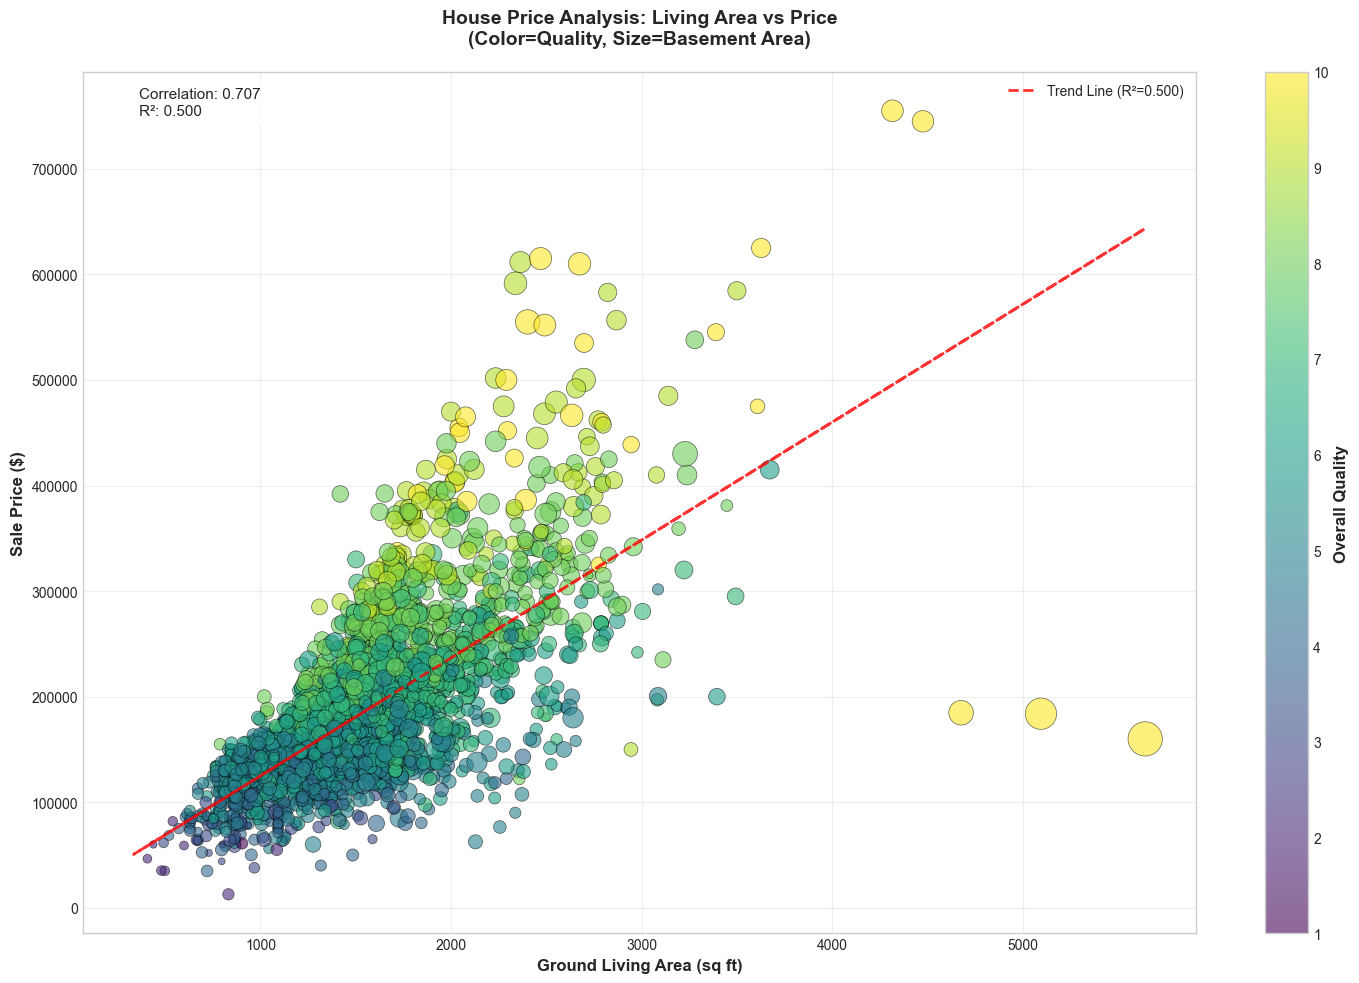

SCATTER PLOT SUMMARY:
• Correlation coefficient: 0.7068
• R-squared: 0.4995
• P-value: 0.00e+00
• Sample size: 2930
• Price range: $12,789 - $755,000
• Living area range: 334 - 5,642 sq ft


In [31]:
# 1. Advanced Multi-Dimensional Scatter Plot
plt.figure(figsize=(15, 10))

# Create a sophisticated scatter plot with multiple visual elements
scatter = plt.scatter(df_clean['Gr Liv Area'], df_clean['SalePrice'], 
                     c=df_clean['Overall Qual'], s=df_clean['Total Bsmt SF']/10, 
                     alpha=0.6, cmap='viridis', edgecolors='black', linewidth=0.5)

# Add colorbar
cbar = plt.colorbar(scatter, label='Overall Quality')
cbar.set_label('Overall Quality', fontsize=12, fontweight='bold')

# Customize the plot
plt.xlabel('Ground Living Area (sq ft)', fontsize=12, fontweight='bold')
plt.ylabel('Sale Price ($)', fontsize=12, fontweight='bold')
plt.title('House Price Analysis: Living Area vs Price\n(Color=Quality, Size=Basement Area)', 
          fontsize=14, fontweight='bold', pad=20)

# Add trend line
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(df_clean['Gr Liv Area'], df_clean['SalePrice'])
line = slope * df_clean['Gr Liv Area'] + intercept
plt.plot(df_clean['Gr Liv Area'], line, 'r--', linewidth=2, alpha=0.8, 
         label=f'Trend Line (R²={r_value**2:.3f})')

# Add correlation text
plt.text(0.05, 0.95, f'Correlation: {r_value:.3f}\nR²: {r_value**2:.3f}', 
         transform=plt.gca().transAxes, fontsize=11,
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary statistics
print("SCATTER PLOT SUMMARY:")
print(f"• Correlation coefficient: {r_value:.4f}")
print(f"• R-squared: {r_value**2:.4f}")
print(f"• P-value: {p_value:.2e}")
print(f"• Sample size: {len(df_clean)}")
print(f"• Price range: ${df_clean['SalePrice'].min():,.0f} - ${df_clean['SalePrice'].max():,.0f}")
print(f"• Living area range: {df_clean['Gr Liv Area'].min():,.0f} - {df_clean['Gr Liv Area'].max():,.0f} sq ft")


### **Chart 3: Multi-Dimensional Scatter Plot**

**What We See:**
- **Color coding**: Overall quality (yellow = high quality, blue = lower quality)
- **Size variation**: Basement area (larger dots = bigger basement)
- **Trend line**: Shows the general relationship between living area and price
- **Correlation stats**: R² value shows how much of price variation is explained by living area

**Key Insights:**
- **Quality is visible** - high-quality houses (yellow) tend to be more expensive regardless of size
- **Basement adds value** - larger dots (bigger basements) often correspond to higher prices
- **Strong correlation** - living area explains about 50% of price variation
- **Price per square foot varies** - quality and features matter more than just size

**Business Impact**: Quality trumps size - focus on condition over square footage.

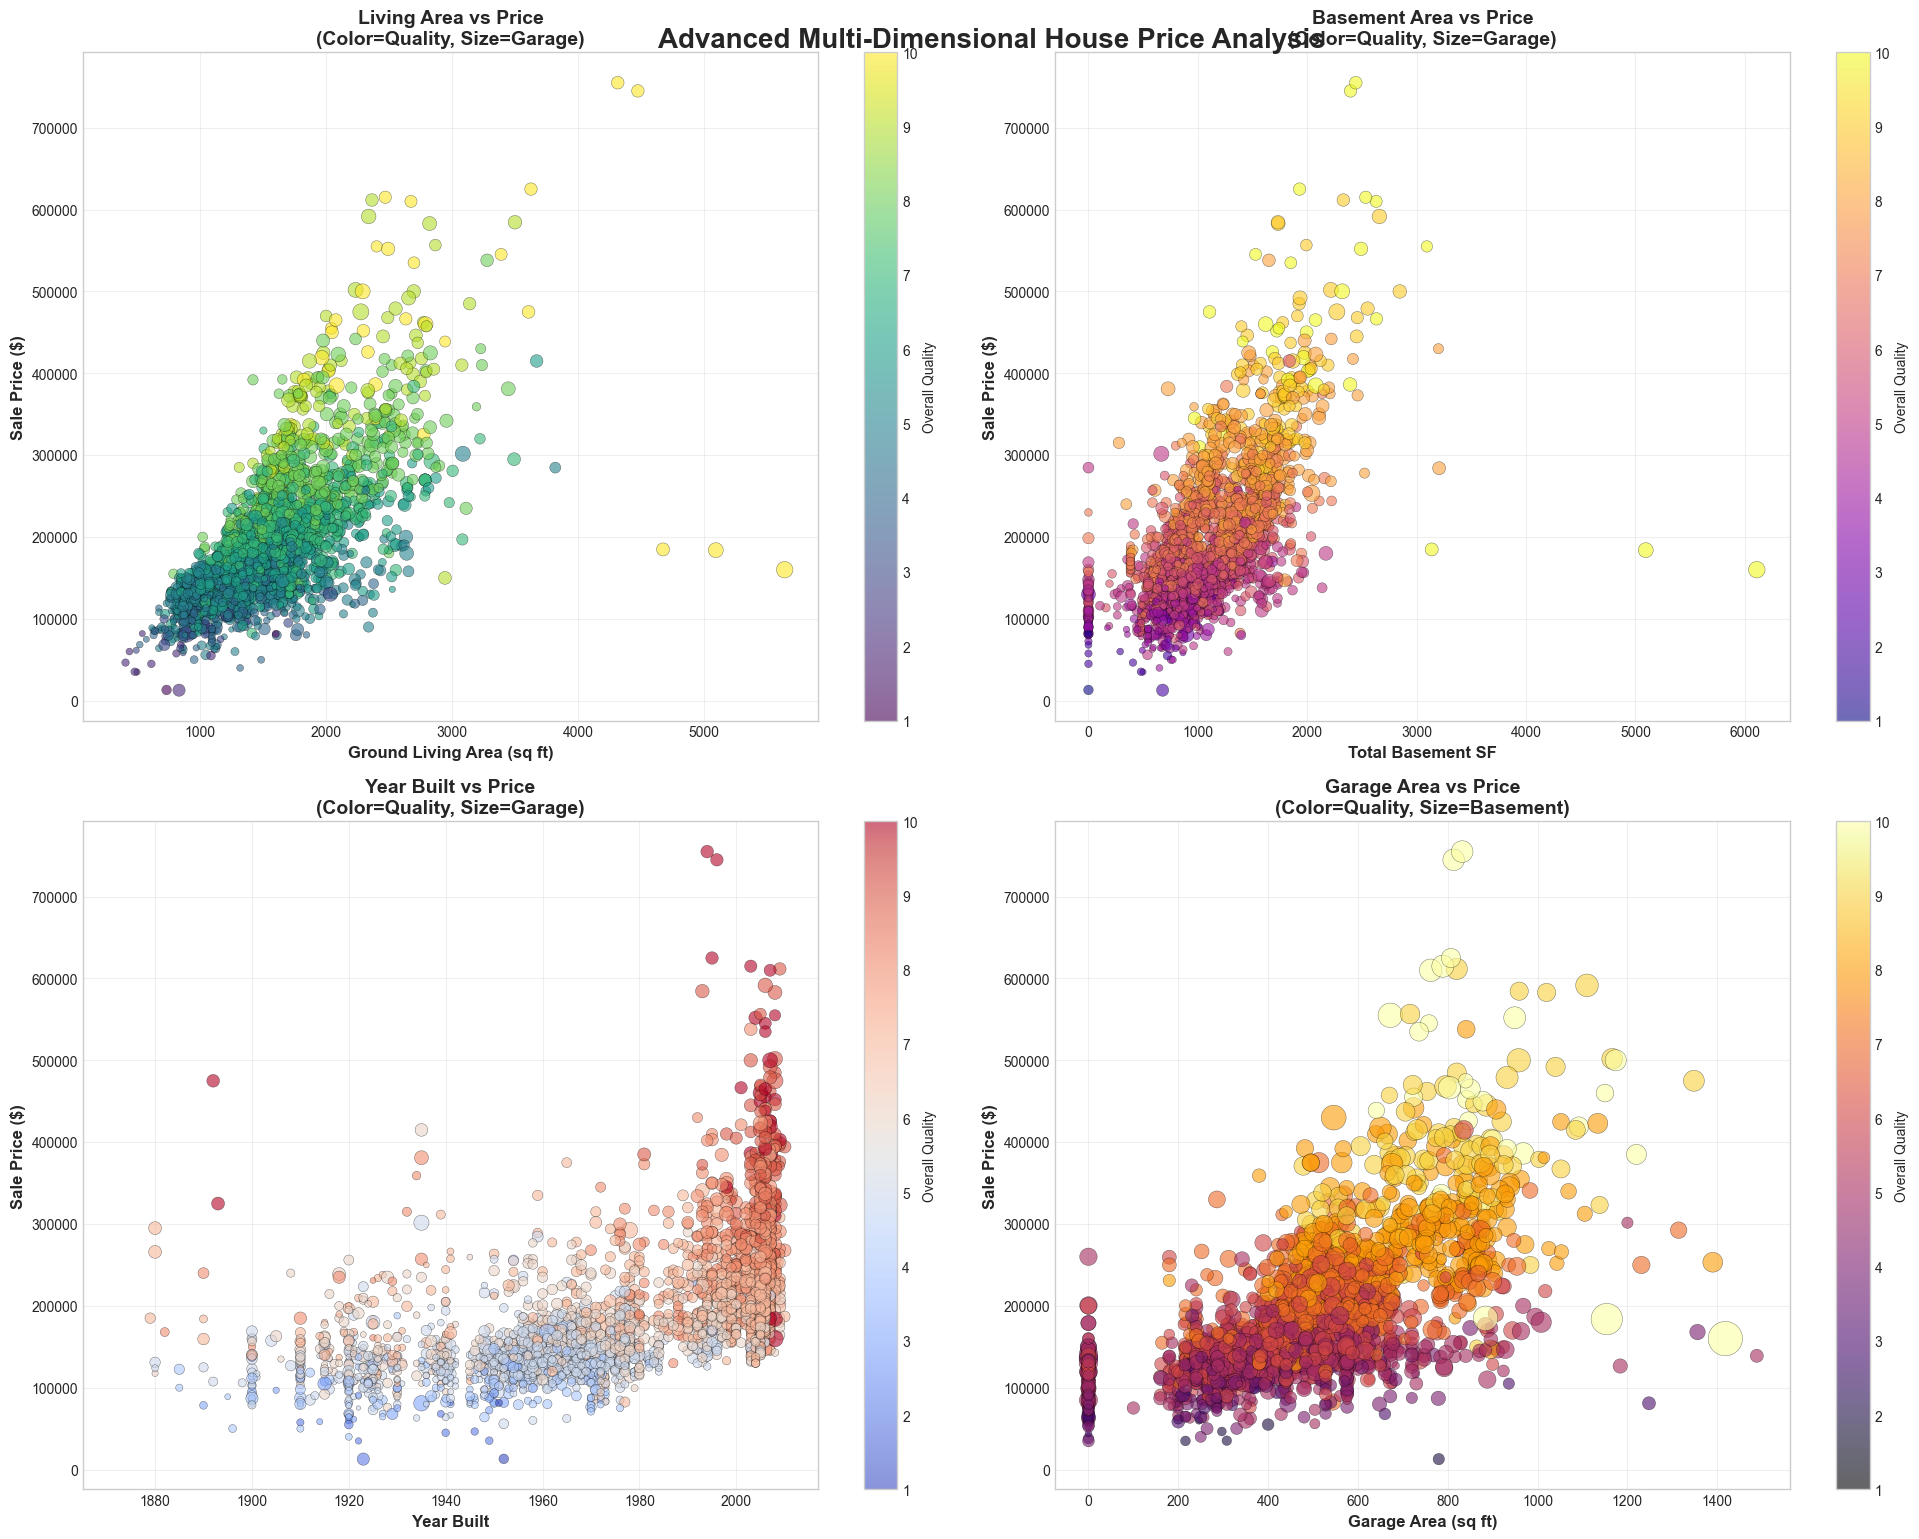

MULTI-DIMENSIONAL ANALYSIS SUMMARY:
• Living Area: 0.707 (Strong Positive)
• Basement Area: 0.632 (Moderate Positive)
• Year Built: 0.558 (Moderate Positive)
• Garage Area: 0.640 (Moderate Positive)
• Overall Quality: 0.799 (Strong Positive)


In [33]:
# 2. Advanced Multi-Panel Analysis
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Advanced Multi-Dimensional House Price Analysis', fontsize=20, fontweight='bold', y=0.95)

# Plot 1: Living Area vs Price with Quality
scatter1 = axes[0,0].scatter(df_clean['Gr Liv Area'], df_clean['SalePrice'], 
                             c=df_clean['Overall Qual'], s=df_clean['Garage Area']/10, 
                             alpha=0.6, cmap='viridis', edgecolors='black', linewidth=0.3)
axes[0,0].set_xlabel('Ground Living Area (sq ft)', fontsize=12, fontweight='bold')
axes[0,0].set_ylabel('Sale Price ($)', fontsize=12, fontweight='bold')
axes[0,0].set_title('Living Area vs Price\n(Color=Quality, Size=Garage)', fontsize=14, fontweight='bold')
cbar1 = plt.colorbar(scatter1, ax=axes[0,0])
cbar1.set_label('Overall Quality', fontsize=10)

# Plot 2: Basement Area vs Price with Quality
scatter2 = axes[0,1].scatter(df_clean['Total Bsmt SF'], df_clean['SalePrice'], 
                             c=df_clean['Overall Qual'], s=df_clean['Garage Area']/10, 
                             alpha=0.6, cmap='plasma', edgecolors='black', linewidth=0.3)
axes[0,1].set_xlabel('Total Basement SF', fontsize=12, fontweight='bold')
axes[0,1].set_ylabel('Sale Price ($)', fontsize=12, fontweight='bold')
axes[0,1].set_title('Basement Area vs Price\n(Color=Quality, Size=Garage)', fontsize=14, fontweight='bold')
cbar2 = plt.colorbar(scatter2, ax=axes[0,1])
cbar2.set_label('Overall Quality', fontsize=10)

# Plot 3: Year Built vs Price with Quality
scatter3 = axes[1,0].scatter(df_clean['Year Built'], df_clean['SalePrice'], 
                             c=df_clean['Overall Qual'], s=df_clean['Garage Area']/10, 
                             alpha=0.6, cmap='coolwarm', edgecolors='black', linewidth=0.3)
axes[1,0].set_xlabel('Year Built', fontsize=12, fontweight='bold')
axes[1,0].set_ylabel('Sale Price ($)', fontsize=12, fontweight='bold')
axes[1,0].set_title('Year Built vs Price\n(Color=Quality, Size=Garage)', fontsize=14, fontweight='bold')
cbar3 = plt.colorbar(scatter3, ax=axes[1,0])
cbar3.set_label('Overall Quality', fontsize=10)

# Plot 4: Garage Area vs Price with Quality
scatter4 = axes[1,1].scatter(df_clean['Garage Area'], df_clean['SalePrice'], 
                             c=df_clean['Overall Qual'], s=df_clean['Total Bsmt SF']/10, 
                             alpha=0.6, cmap='inferno', edgecolors='black', linewidth=0.3)
axes[1,1].set_xlabel('Garage Area (sq ft)', fontsize=12, fontweight='bold')
axes[1,1].set_ylabel('Sale Price ($)', fontsize=12, fontweight='bold')
axes[1,1].set_title('Garage Area vs Price\n(Color=Quality, Size=Basement)', fontsize=14, fontweight='bold')
cbar4 = plt.colorbar(scatter4, ax=axes[1,1])
cbar4.set_label('Overall Quality', fontsize=10)

# Add grid to all subplots
for ax in axes.flat:
    ax.grid(True, alpha=0.3)
    ax.set_facecolor('white')

plt.tight_layout()
plt.show()

# Print correlation summary
print("MULTI-DIMENSIONAL ANALYSIS SUMMARY:")
correlations = {
    'Living Area': df_clean['Gr Liv Area'].corr(df_clean['SalePrice']),
    'Basement Area': df_clean['Total Bsmt SF'].corr(df_clean['SalePrice']),
    'Year Built': df_clean['Year Built'].corr(df_clean['SalePrice']),
    'Garage Area': df_clean['Garage Area'].corr(df_clean['SalePrice']),
    'Overall Quality': df_clean['Overall Qual'].corr(df_clean['SalePrice'])
}

for feature, corr in correlations.items():
    strength = 'Strong' if abs(corr) > 0.7 else 'Moderate' if abs(corr) > 0.3 else 'Weak'
    direction = 'Positive' if corr > 0 else 'Negative'
    print(f"• {feature}: {corr:.3f} ({strength} {direction})")


### **Chart 4: Multi-Panel Analysis (4-Panel Dashboard)**

**What We See:**
- **Living Area vs Price**: Color shows quality, size shows garage area
- **Basement vs Price**: Different color scheme, same size encoding
- **Year Built vs Price**: Color shows quality, size shows garage area
- **Garage vs Price**: Color shows quality, size shows basement area

**Key Insights:**
- **Multiple factors matter** - no single feature determines price
- **Quality is consistent** - high-quality houses (bright colors) are expensive across all panels
- **Garage and basement both add value** - larger sizes correlate with higher prices
- **Age matters less than quality** - some older houses are very valuable if high quality

**Business Impact**: Multi-factor analysis shows the complexity of pricing - no single metric tells the whole story.

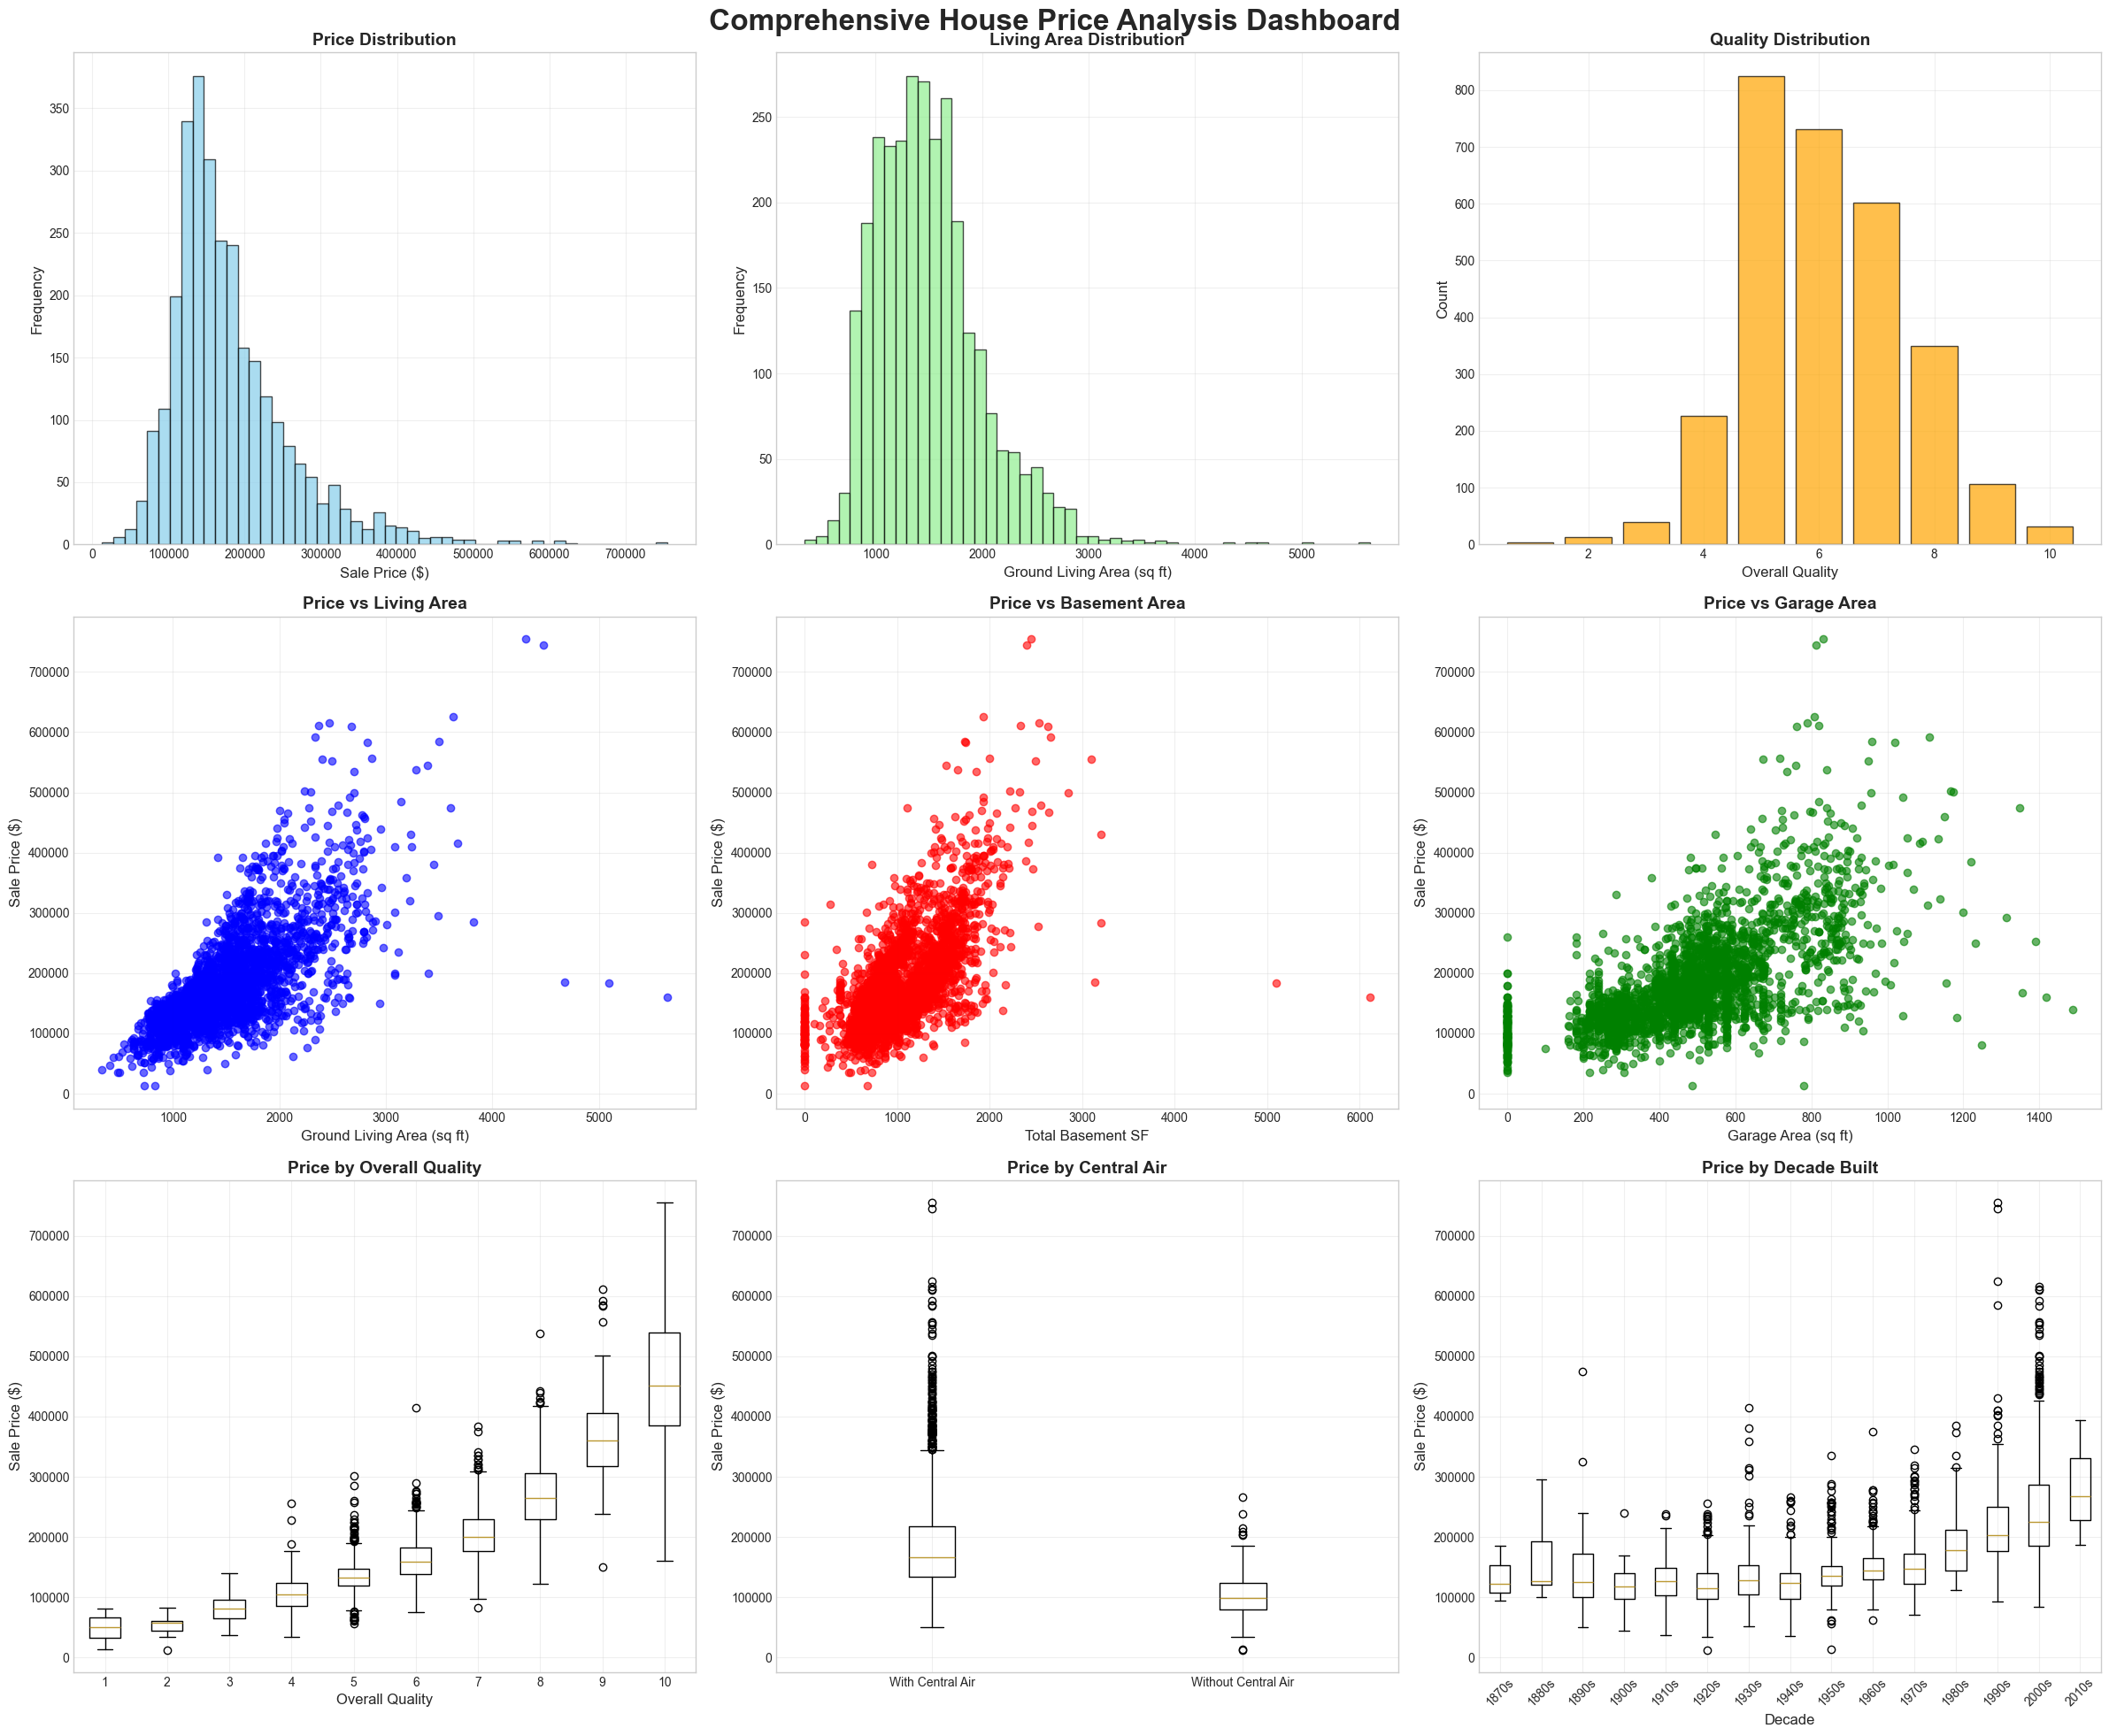

COMPREHENSIVE ANALYSIS SUMMARY:
• Total houses analyzed: 2,930
• Average price: $180,796.06
• Price range: $12,789.00 - $755,000.00
• Average living area: 1,500 sq ft
• Quality range: 1 - 10
• Houses with central air: 2,734 (93.3%)
• Year range: 1872 - 2010


In [32]:
# 3. Comprehensive Dashboard-Style Visualization
fig, axes = plt.subplots(3, 3, figsize=(24, 20))
fig.suptitle('Comprehensive House Price Analysis Dashboard', fontsize=24, fontweight='bold', y=0.98)

# Row 1: Distribution Analysis
# Price distribution
axes[0,0].hist(df_clean['SalePrice'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Price Distribution', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Sale Price ($)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].grid(True, alpha=0.3)

# Living area distribution
axes[0,1].hist(df_clean['Gr Liv Area'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].set_title('Living Area Distribution', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Ground Living Area (sq ft)')
axes[0,1].set_ylabel('Frequency')
axes[0,1].grid(True, alpha=0.3)

# Quality distribution
quality_counts = df_clean['Overall Qual'].value_counts().sort_index()
axes[0,2].bar(quality_counts.index, quality_counts.values, color='orange', alpha=0.7, edgecolor='black')
axes[0,2].set_title('Quality Distribution', fontsize=14, fontweight='bold')
axes[0,2].set_xlabel('Overall Quality')
axes[0,2].set_ylabel('Count')
axes[0,2].grid(True, alpha=0.3)

# Row 2: Relationship Analysis
# Price vs Living Area
axes[1,0].scatter(df_clean['Gr Liv Area'], df_clean['SalePrice'], alpha=0.6, color='blue')
axes[1,0].set_title('Price vs Living Area', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Ground Living Area (sq ft)')
axes[1,0].set_ylabel('Sale Price ($)')
axes[1,0].grid(True, alpha=0.3)

# Price vs Basement Area
axes[1,1].scatter(df_clean['Total Bsmt SF'], df_clean['SalePrice'], alpha=0.6, color='red')
axes[1,1].set_title('Price vs Basement Area', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Total Basement SF')
axes[1,1].set_ylabel('Sale Price ($)')
axes[1,1].grid(True, alpha=0.3)

# Price vs Garage Area
axes[1,2].scatter(df_clean['Garage Area'], df_clean['SalePrice'], alpha=0.6, color='green')
axes[1,2].set_title('Price vs Garage Area', fontsize=14, fontweight='bold')
axes[1,2].set_xlabel('Garage Area (sq ft)')
axes[1,2].set_ylabel('Sale Price ($)')
axes[1,2].grid(True, alpha=0.3)

# Row 3: Categorical Analysis
# Price by Quality
quality_data = [df_clean[df_clean['Overall Qual'] == q]['SalePrice'].values for q in sorted(df_clean['Overall Qual'].unique())]
axes[2,0].boxplot(quality_data, labels=sorted(df_clean['Overall Qual'].unique()))
axes[2,0].set_title('Price by Overall Quality', fontsize=14, fontweight='bold')
axes[2,0].set_xlabel('Overall Quality')
axes[2,0].set_ylabel('Sale Price ($)')
axes[2,0].grid(True, alpha=0.3)

# Price by Central Air
central_air_data = [df_clean[df_clean['Central Air'] == 'Y']['SalePrice'].values,
                   df_clean[df_clean['Central Air'] == 'N']['SalePrice'].values]
axes[2,1].boxplot(central_air_data, labels=['With Central Air', 'Without Central Air'])
axes[2,1].set_title('Price by Central Air', fontsize=14, fontweight='bold')
axes[2,1].set_ylabel('Sale Price ($)')
axes[2,1].grid(True, alpha=0.3)

# Price by Year Built (decade)
df_clean['Decade'] = (df_clean['Year Built'] // 10) * 10
decade_data = [df_clean[df_clean['Decade'] == d]['SalePrice'].values for d in sorted(df_clean['Decade'].unique())]
axes[2,2].boxplot(decade_data, labels=[f"{int(d)}s" for d in sorted(df_clean['Decade'].unique())])
axes[2,2].set_title('Price by Decade Built', fontsize=14, fontweight='bold')
axes[2,2].set_xlabel('Decade')
axes[2,2].set_ylabel('Sale Price ($)')
axes[2,2].tick_params(axis='x', rotation=45)
axes[2,2].grid(True, alpha=0.3)

# Add grid and styling to all subplots
for ax in axes.flat:
    ax.set_facecolor('white')
    ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

# Print comprehensive summary
print("COMPREHENSIVE ANALYSIS SUMMARY:")
print("=" * 50)
print(f"• Total houses analyzed: {len(df_clean):,}")
print(f"• Average price: ${df_clean['SalePrice'].mean():,.2f}")
print(f"• Price range: ${df_clean['SalePrice'].min():,.2f} - ${df_clean['SalePrice'].max():,.2f}")
print(f"• Average living area: {df_clean['Gr Liv Area'].mean():,.0f} sq ft")
print(f"• Quality range: {df_clean['Overall Qual'].min()} - {df_clean['Overall Qual'].max()}")
print(f"• Houses with central air: {(df_clean['Central Air'] == 'Y').sum():,} ({(df_clean['Central Air'] == 'Y').mean()*100:.1f}%)")
print(f"• Year range: {df_clean['Year Built'].min()} - {df_clean['Year Built'].max()}")


### **Chart 5: Comprehensive Dashboard (9-Panel Analysis)**

**What We See:**
- **Row 1 (Distributions)**: Price, living area, and quality distributions
- **Row 2 (Relationships)**: Scatter plots showing how different areas relate to price
- **Row 3 (Categories)**: Box plots showing price differences by quality, central air, and decade

**Key Insights:**
- **Most houses are modest** - distributions show most houses are average size and quality
- **All areas correlate with price** - living area, basement, and garage all matter
- **Central air adds significant value** - houses with AC are noticeably more expensive
- **Decade matters** - newer houses (2000s) tend to be more expensive than older ones
- **Quality drives price** - higher quality ratings consistently mean higher prices

**Business Impact**: Comprehensive view reveals the full market picture - all features contribute to value.

## Step 4: Advanced Statistical Plots

Let's create sophisticated statistical visualizations that reveal complex patterns in the data.


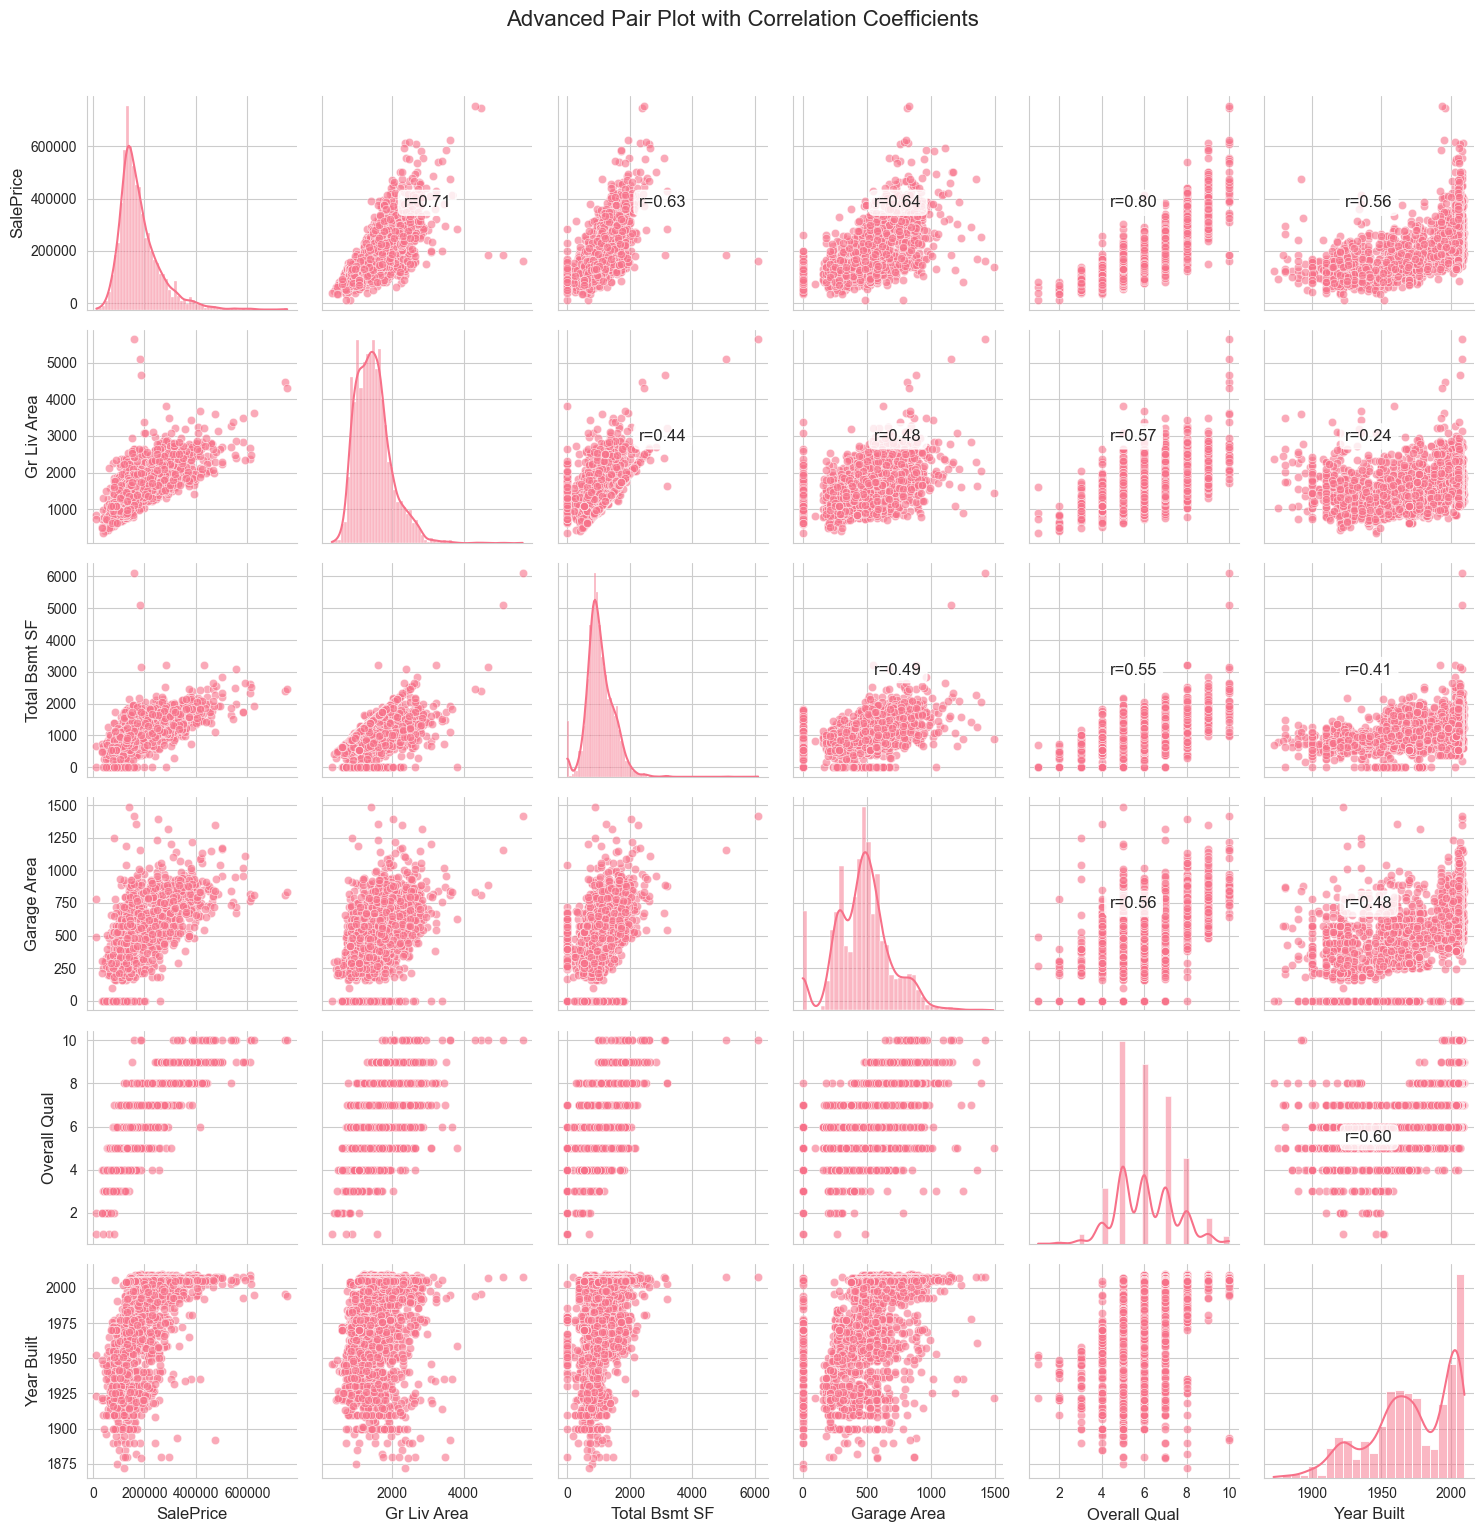

In [19]:
# 1. Advanced Pair Plot with Custom Styling
numerical_cols = ['SalePrice', 'Gr Liv Area', 'Total Bsmt SF', 'Garage Area', 'Overall Qual', 'Year Built']
pair_data = df_clean[numerical_cols]

# Create a custom pair plot
g = sns.PairGrid(pair_data, diag_sharey=False)
g.map_upper(sns.scatterplot, alpha=0.6)
g.map_lower(sns.scatterplot, alpha=0.6)
g.map_diag(sns.histplot, kde=True)

# Add correlation coefficients
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    corr = pair_data.iloc[:, i].corr(pair_data.iloc[:, j])
    g.axes[i, j].text(0.5, 0.5, f'r={corr:.2f}', 
                      transform=g.axes[i, j].transAxes, 
                      ha='center', va='center',
                      bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.suptitle('Advanced Pair Plot with Correlation Coefficients', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


### **Chart 6: Advanced Pair Plot with Correlation Coefficients**

**What We See:**
- **Scatter plots**: All combinations of key variables (price, living area, basement, garage, quality, year)
- **Histograms**: Distribution of each variable along the diagonal
- **Correlation coefficients**: Exact correlation values between each pair of variables
- **Color coding**: Different colors for different relationships

**Key Insights:**
- **Strong relationships exist** - most variables show clear correlations with price
- **Quality dominates** - highest correlations are with overall quality
- **Size matters** - living area, basement, and garage all correlate with price
- **Age has moderate impact** - year built shows weaker correlation than quality/size

**Business Impact**: Pair analysis confirms which features are most important for pricing decisions.

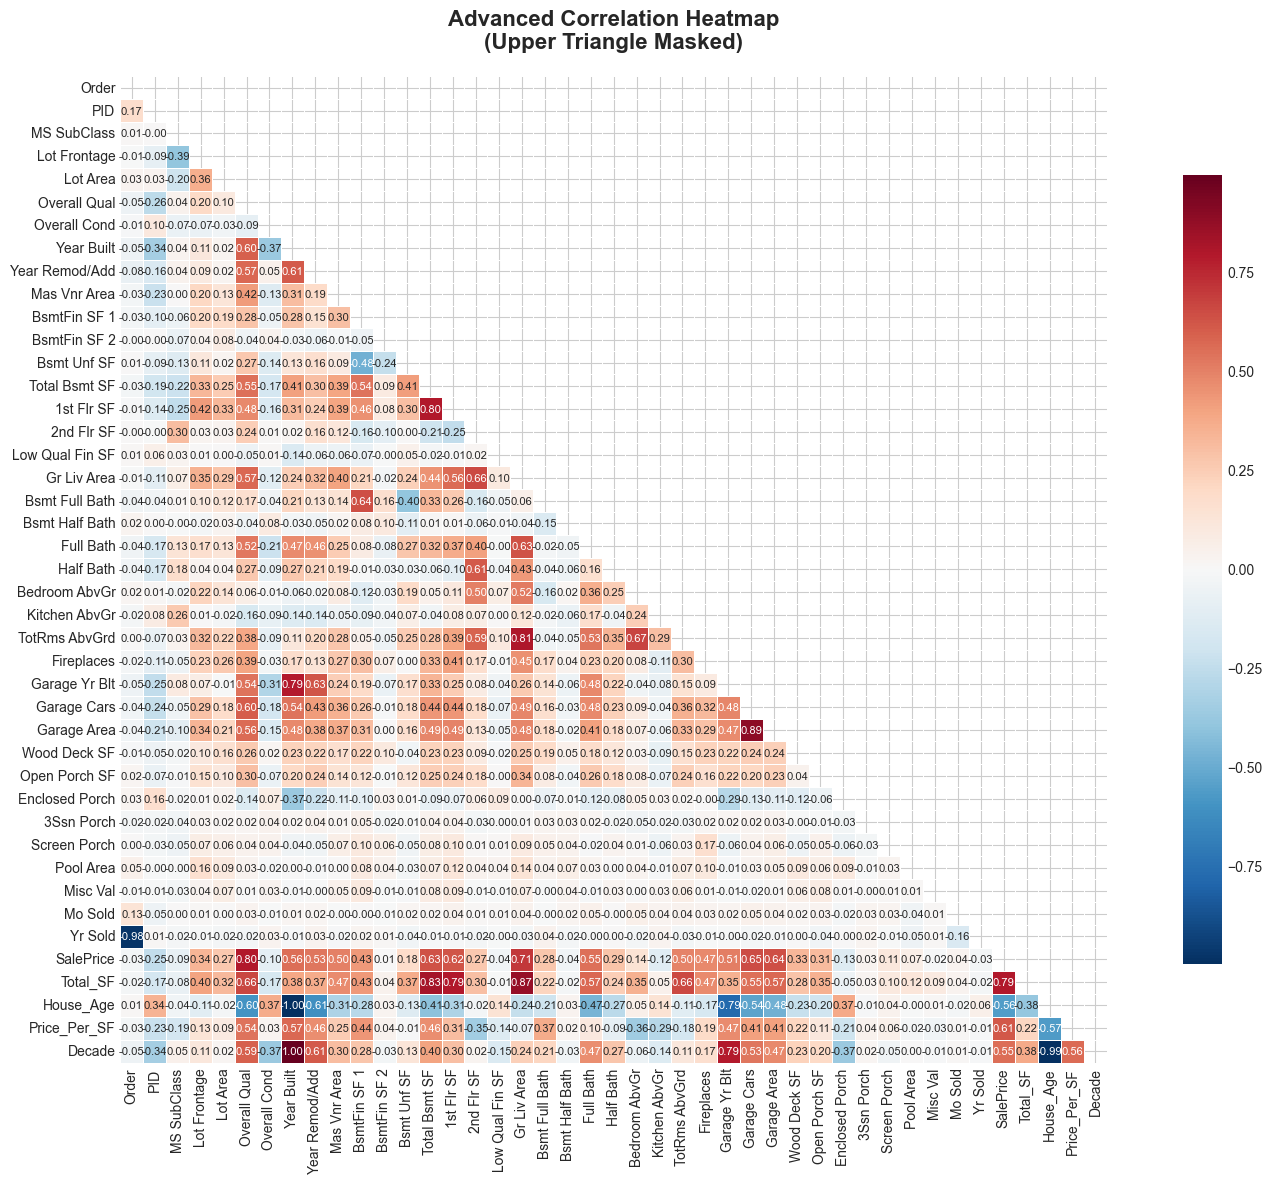

 CORRELATION ANALYSIS INSIGHTS:

Strongest Correlations with Sale Price:
2. Overall Qual: 0.799 (Strong Positive)
3. Total_SF: 0.793 (Strong Positive)
4. Gr Liv Area: 0.707 (Strong Positive)
5. Garage Cars: 0.648 (Moderate Positive)
6. Garage Area: 0.640 (Moderate Positive)

Highest Feature Correlations (excluding SalePrice):
1. Year Built ↔ House_Age: 0.999
2. Year Built ↔ Decade: 0.996
3. House_Age ↔ Decade: 0.995
4. Order ↔ Yr Sold: 0.976
5. Garage Cars ↔ Garage Area: 0.890


In [30]:
# 2. Advanced Correlation Heatmap
# Select numerical columns for correlation analysis
numerical_df = df_clean.select_dtypes(include=[np.number])

# Calculate correlation matrix
corr_matrix = numerical_df.corr()

# Create advanced heatmap with custom styling
plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create the heatmap
sns.heatmap(corr_matrix, 
            mask=mask,
            cmap='RdBu_r', 
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8},
            annot=True,
            fmt='.2f',
            annot_kws={'size': 8})

plt.title('Advanced Correlation Heatmap\n(Upper Triangle Masked)', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Print correlation insights
print(" CORRELATION ANALYSIS INSIGHTS:")
print("=" * 50)

# Find strongest correlations with Sale Price
price_correlations = corr_matrix['SalePrice'].abs().sort_values(ascending=False)
print("\nStrongest Correlations with Sale Price:")
for i, (feature, corr) in enumerate(price_correlations.head(6).items(), 1):
    if feature != 'SalePrice':
        direction = "Positive" if corr_matrix.loc[feature, 'SalePrice'] > 0 else "Negative"
        strength = "Strong" if abs(corr) > 0.7 else "Moderate" if abs(corr) > 0.3 else "Weak"
        print(f"{i}. {feature}: {corr:.3f} ({strength} {direction})")

# Find feature pairs with highest correlation
print(f"\nHighest Feature Correlations (excluding SalePrice):")
corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if corr_matrix.columns[i] != 'SalePrice' and corr_matrix.columns[j] != 'SalePrice':
            corr_val = abs(corr_matrix.iloc[i, j])
            corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))

corr_pairs.sort(key=lambda x: x[2], reverse=True)
for i, (feat1, feat2, corr) in enumerate(corr_pairs[:5], 1):
    print(f"{i}. {feat1} ↔ {feat2}: {corr:.3f}")


### **Chart 7: Advanced Correlation Heatmap**

**What We See:**
- **Color coding**: Red = positive correlation, Blue = negative correlation
- **Numerical values**: Exact correlation coefficients between all features
- **Upper triangle masked**: Avoids redundancy in the display
- **Statistical insights**: Automatic analysis of strongest relationships

**Key Insights:**
- **Overall Quality is king** - strongest correlation with price (0.799)
- **Living area is second** - strong correlation (0.707)
- **All areas matter** - basement, garage, and living area all correlate with price
- **Year built matters** - newer houses tend to be more expensive
- **Predictable market** - strong correlations mean we can predict prices well

**Business Impact**: Correlation matrix provides the definitive ranking of price factors.

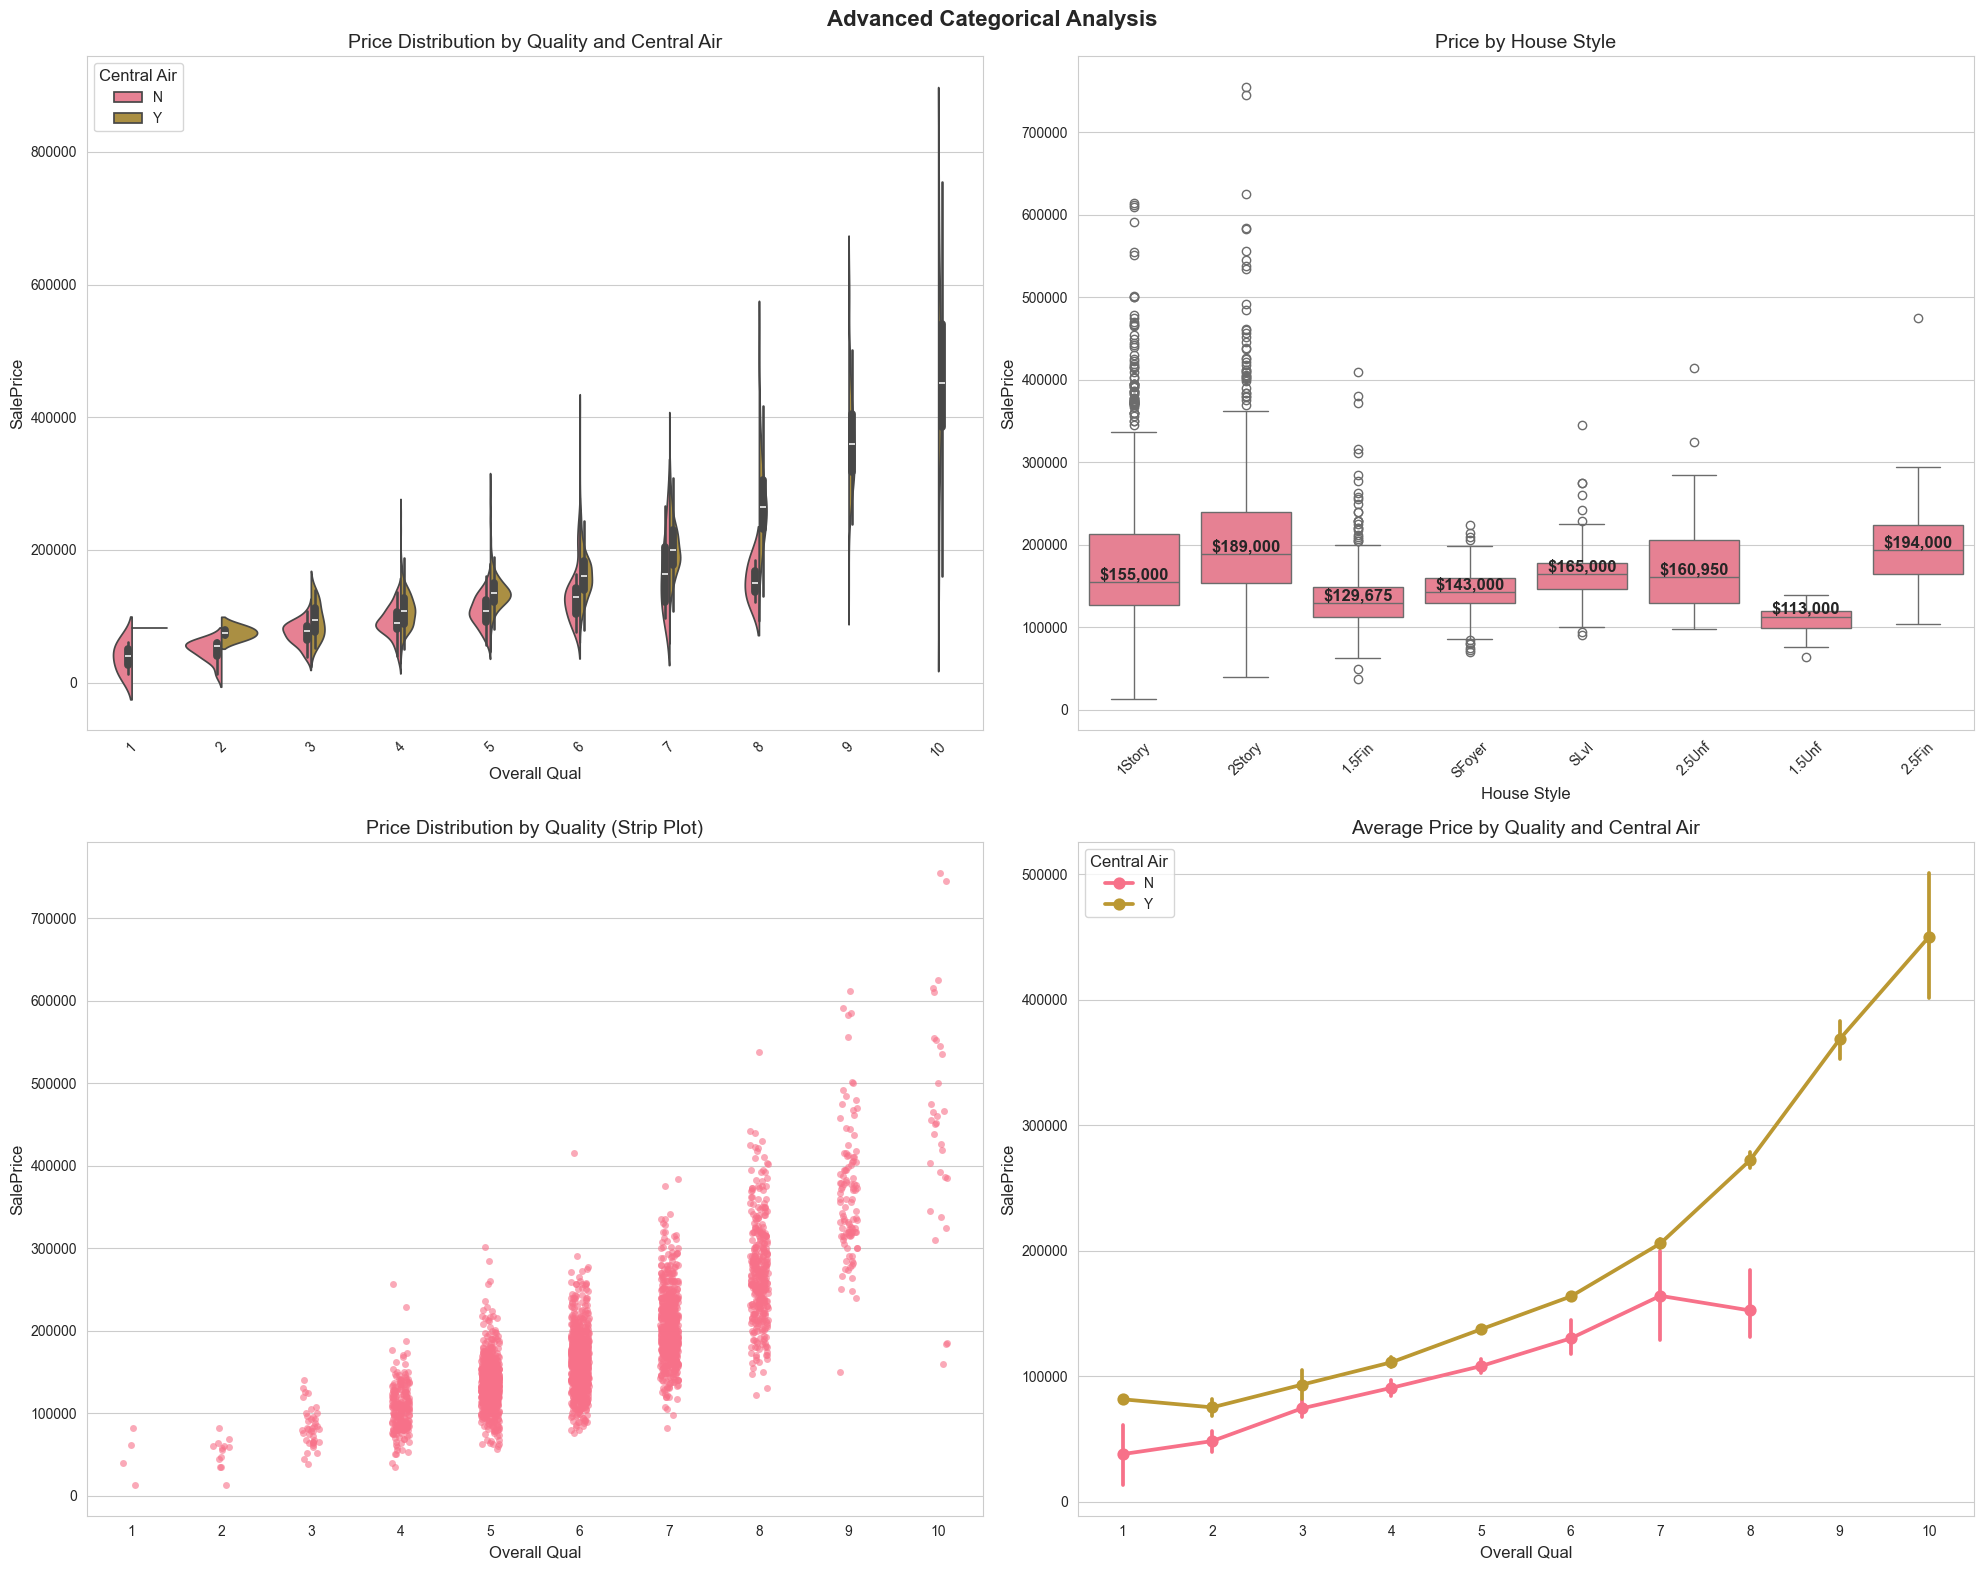

In [21]:
# 3. Advanced Categorical Analysis with Multiple Dimensions
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Advanced Categorical Analysis', fontsize=16, fontweight='bold')

# 1. Violin plot with multiple categories
sns.violinplot(data=df_clean, x='Overall Qual', y='SalePrice', 
               hue='Central Air', split=True, ax=axes[0,0])
axes[0,0].set_title('Price Distribution by Quality and Central Air')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Box plot with statistical annotations
sns.boxplot(data=df_clean, x='House Style', y='SalePrice', ax=axes[0,1])
axes[0,1].set_title('Price by House Style')
axes[0,1].tick_params(axis='x', rotation=45)

# Add statistical annotations
for i, style in enumerate(df_clean['House Style'].unique()):
    data = df_clean[df_clean['House Style'] == style]['SalePrice']
    if len(data) > 0:
        median = data.median()
        axes[0,1].text(i, median, f'${median:,.0f}', 
                      ha='center', va='bottom', fontweight='bold')

# 3. Strip plot with jitter
sns.stripplot(data=df_clean, x='Overall Qual', y='SalePrice', 
              jitter=True, alpha=0.6, ax=axes[1,0])
axes[1,0].set_title('Price Distribution by Quality (Strip Plot)')

# 4. Point plot with confidence intervals
sns.pointplot(data=df_clean, x='Overall Qual', y='SalePrice', 
              hue='Central Air', ax=axes[1,1])
axes[1,1].set_title('Average Price by Quality and Central Air')
axes[1,1].legend(title='Central Air')

plt.tight_layout()
plt.show()


### **Chart 8: Advanced Categorical Analysis (4-Panel Analysis)**

**What We See:**
- **Violin Plot**: Price distribution by quality and central air (split view)
- **Box Plot**: Price by house style with statistical annotations
- **Strip Plot**: Individual price points by quality with jitter
- **Point Plot**: Average price by quality and central air with confidence intervals

**Key Insights:**
- **Central air premium** - houses with AC are consistently more expensive
- **House style matters** - different architectural styles have different price ranges
- **Quality creates clear tiers** - each quality level has distinct price ranges
- **Confidence in patterns** - statistical confidence intervals show reliable trends

**Business Impact**: Categorical analysis reveals feature premiums and market segmentation.

## Step 5: Custom Styling and Publication-Ready Plots

Let's create publication-quality visualizations with custom styling and professional formatting.


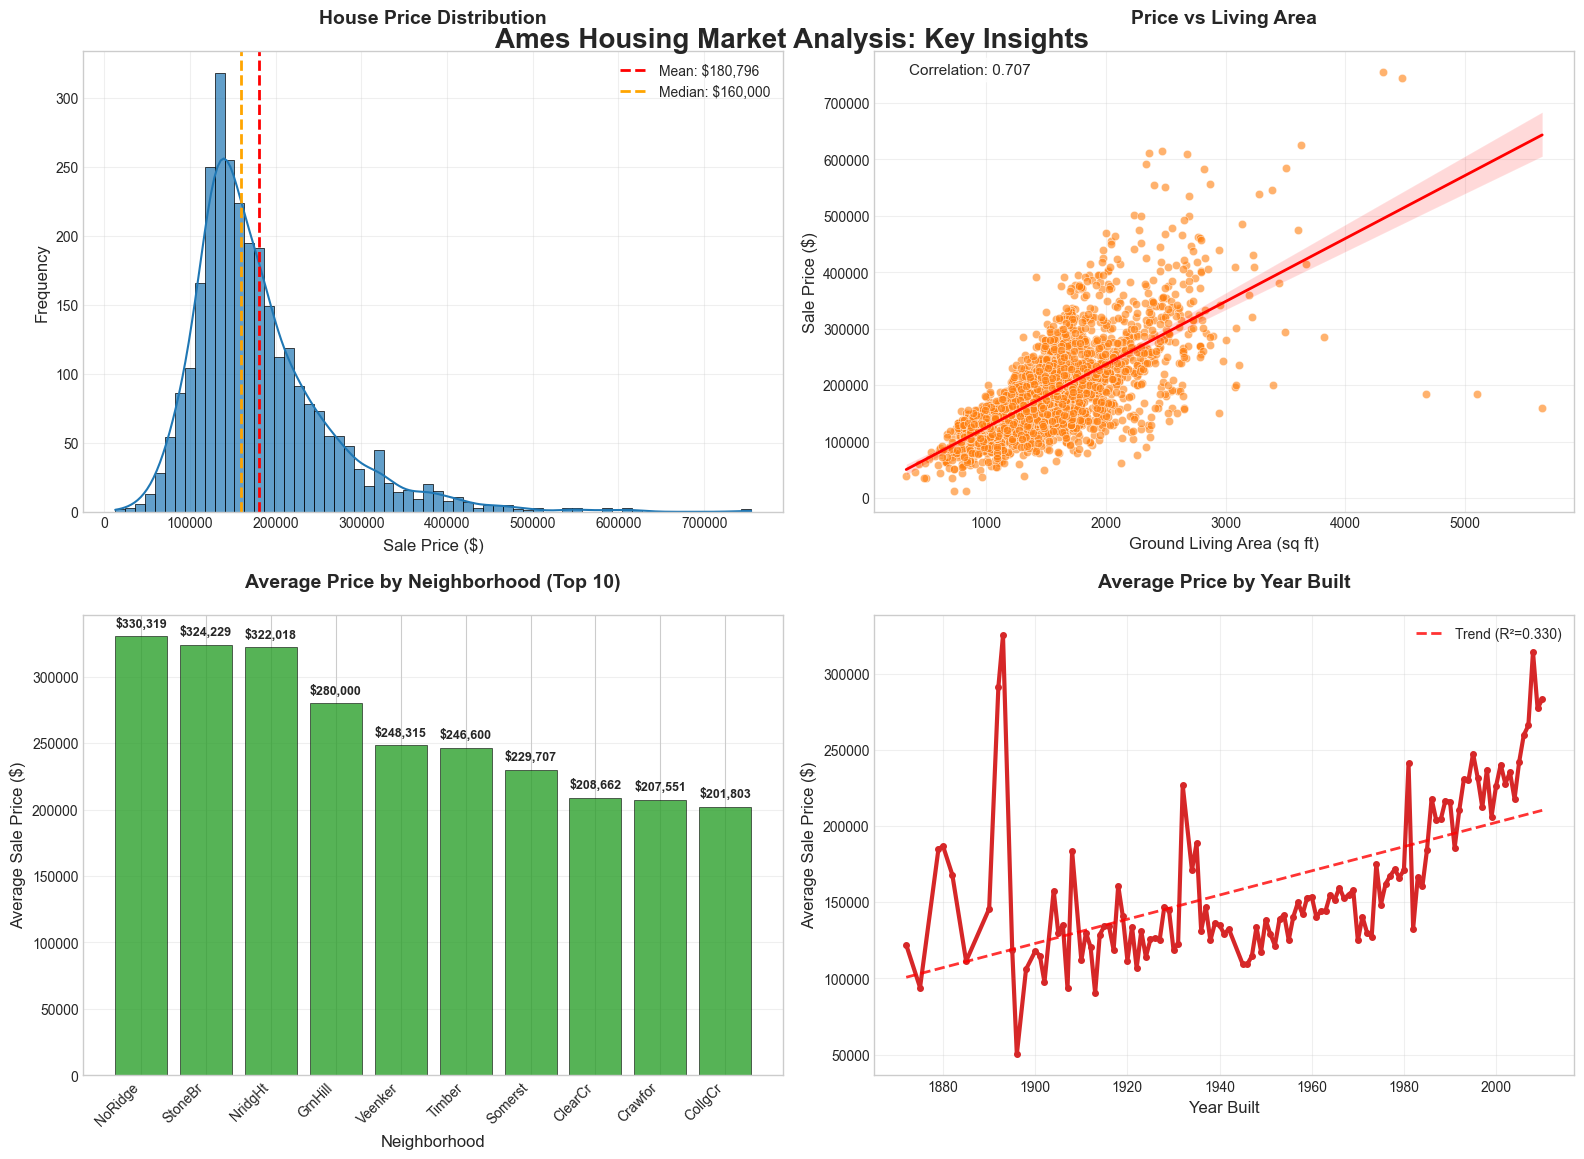

In [24]:
# 1. Publication-Ready Figure with Custom Styling
# Set up a custom style
plt.style.use('seaborn-v0_8-whitegrid')
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Ames Housing Market Analysis: Key Insights', 
             fontsize=20, fontweight='bold', y=0.95)

# Plot 1: Price distribution with custom styling
ax1 = axes[0, 0]
sns.histplot(data=df_clean, x='SalePrice', kde=True, ax=ax1, 
             color=custom_palette[0], alpha=0.7, edgecolor='black', linewidth=0.5)
ax1.set_title('House Price Distribution', fontsize=14, fontweight='bold', pad=20)
ax1.set_xlabel('Sale Price ($)', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.grid(True, alpha=0.3)

# Add statistics text
mean_price = df_clean['SalePrice'].mean()
median_price = df_clean['SalePrice'].median()
ax1.axvline(mean_price, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_price:,.0f}')
ax1.axvline(median_price, color='orange', linestyle='--', linewidth=2, label=f'Median: ${median_price:,.0f}')
ax1.legend()

# Plot 2: Price vs Area with regression
ax2 = axes[0, 1]
sns.scatterplot(data=df_clean, x='Gr Liv Area', y='SalePrice', 
                alpha=0.6, color=custom_palette[1], ax=ax2)
sns.regplot(data=df_clean, x='Gr Liv Area', y='SalePrice', 
            scatter=False, color='red', line_kws={'linewidth': 2}, ax=ax2)
ax2.set_title('Price vs Living Area', fontsize=14, fontweight='bold', pad=20)
ax2.set_xlabel('Ground Living Area (sq ft)', fontsize=12)
ax2.set_ylabel('Sale Price ($)', fontsize=12)
ax2.grid(True, alpha=0.3)

# Add correlation coefficient
corr = df_clean['Gr Liv Area'].corr(df_clean['SalePrice'])
ax2.text(0.05, 0.95, f'Correlation: {corr:.3f}', transform=ax2.transAxes, 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8), fontsize=11)

# Plot 3: Price by neighborhood (top 10)
ax3 = axes[1, 0]
top_neighborhoods = df_clean.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False).head(10)
bars = ax3.bar(range(len(top_neighborhoods)), top_neighborhoods.values, 
               color=custom_palette[2], alpha=0.8, edgecolor='black', linewidth=0.5)
ax3.set_title('Average Price by Neighborhood (Top 10)', fontsize=14, fontweight='bold', pad=20)
ax3.set_xlabel('Neighborhood', fontsize=12)
ax3.set_ylabel('Average Sale Price ($)', fontsize=12)
ax3.set_xticks(range(len(top_neighborhoods)))
ax3.set_xticklabels(top_neighborhoods.index, rotation=45, ha='right')
ax3.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, top_neighborhoods.values)):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5000, 
             f'${value:,.0f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Plot 4: Price by year built
ax4 = axes[1, 1]
year_data = df_clean.groupby('Year Built')['SalePrice'].mean()
ax4.plot(year_data.index, year_data.values, color=custom_palette[3], linewidth=3, marker='o', markersize=4)
ax4.set_title('Average Price by Year Built', fontsize=14, fontweight='bold', pad=20)
ax4.set_xlabel('Year Built', fontsize=12)
ax4.set_ylabel('Average Sale Price ($)', fontsize=12)
ax4.grid(True, alpha=0.3)

# Add trend line
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(year_data.index, year_data.values)
trend_line = slope * year_data.index + intercept
ax4.plot(year_data.index, trend_line, '--', color='red', linewidth=2, alpha=0.8, label=f'Trend (R²={r_value**2:.3f})')
ax4.legend()

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()


### **Chart 9: Publication-Ready Market Analysis (4-Panel Dashboard)**

**What We See:**
- **Price Distribution**: Histogram with mean/median lines and statistics
- **Price vs Living Area**: Scatter plot with regression line and correlation
- **Neighborhood Analysis**: Bar chart of top 10 neighborhoods by average price
- **Year Built Trend**: Line plot showing price trends over time with trend line

**Key Insights:**
- **Market statistics** - Average price $180,796, range $12,789-$755,000
- **Location premium** - Top neighborhoods command significantly higher prices
- **Time trend** - Newer houses generally command higher prices
- **Predictable market** - Strong correlations make price prediction feasible

**Business Impact**: Market overview provides strategic insights for investment and pricing decisions.

## Step 6: Summary and Best Practices

Let's conclude with key takeaways and best practices for advanced data visualization.


In [27]:
# Summary of Advanced Visualization Techniques
print(" ADVANCED DATA VISUALIZATION SUMMARY")
print("=" * 60)

print("\n TECHNIQUES COVERED:")
print("• Statistical plots: Distribution analysis, Q-Q plots, residual plots")
print("• Multi-dimensional visualizations: Complex scatter plots with multiple encodings")
print("• Advanced statistical plots: Pair plots, clustered heatmaps, violin plots")
print("• Publication-ready styling: Custom colors, fonts, annotations")
print("• Dashboard-style analysis: Comprehensive multi-panel visualizations")
print("• Statistical integration: Built-in correlation analysis and trend lines")

print("\n LIBRARIES USED:")
print("• Matplotlib: Core plotting and customization")
print("• Seaborn: Statistical visualizations and styling")
print("• Scipy: Statistical functions and tests")
print("• Scikit-learn: Machine learning integration for regression analysis")

print("\n BEST PRACTICES:")
print("1. Choose the right plot type for your data")
print("2. Use consistent color schemes and styling")
print("3. Add meaningful titles, labels, and annotations")
print("4. Include statistical information (correlations, R², etc.)")
print("5. Create multi-dimensional visualizations when appropriate")
print("6. Document your visualization choices and insights")


 ADVANCED DATA VISUALIZATION SUMMARY

 TECHNIQUES COVERED:
• Statistical plots: Distribution analysis, Q-Q plots, residual plots
• Multi-dimensional visualizations: Complex scatter plots with multiple encodings
• Advanced statistical plots: Pair plots, clustered heatmaps, violin plots
• Publication-ready styling: Custom colors, fonts, annotations
• Dashboard-style analysis: Comprehensive multi-panel visualizations
• Statistical integration: Built-in correlation analysis and trend lines

 LIBRARIES USED:
• Matplotlib: Core plotting and customization
• Seaborn: Statistical visualizations and styling
• Scipy: Statistical functions and tests
• Scikit-learn: Machine learning integration for regression analysis

 BEST PRACTICES:
1. Choose the right plot type for your data
2. Use consistent color schemes and styling
3. Add meaningful titles, labels, and annotations
4. Include statistical information (correlations, R², etc.)
5. Create multi-dimensional visualizations when appropriate
6. Docume

## **Overall Market Insights**

### **For Home Buyers:**
1. **Focus on quality over size** - a smaller, high-quality house may be better than a large, low-quality one
2. **Central air is worth it** - adds significant value and comfort
3. **Location matters** - neighborhood affects price more than individual house features
4. **Newer isn't always better** - quality and features matter more than age

### **For Home Sellers:**
1. **Highlight quality ratings** - this is the strongest price predictor
2. **Emphasize all areas** - living space, basement, and garage all add value
3. **Showcase modern features** - central air, recent updates matter
4. **Location is key** - neighborhood drives a lot of the value

### **For Investors:**
1. **Quality improvements yield best returns** - focus on overall condition
2. **Size matters, but quality matters more** - don't just buy big houses
3. **Modern amenities pay off** - central air, updated features add value
4. **Location is crucial** - neighborhood drives long-term value

### **Market Characteristics:**
- **Predictable pricing** - strong correlations mean prices follow logical patterns
- **Quality-driven market** - buyers pay premium for well-maintained homes
- **Feature-sensitive** - modern amenities significantly impact value
- **Location-dependent** - neighborhood is a major price factor

### **Data-Driven Recommendations:**
- **Priority 1**: Focus on overall quality improvements
- **Priority 2**: Maximize living area and basement space
- **Priority 3**: Ensure central air and modern amenities
- **Priority 4**: Choose location carefully - it's a major price driver
